**Handwritten digits classification using neural network**

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [5]:
X_train.shape

(60000, 28, 28)

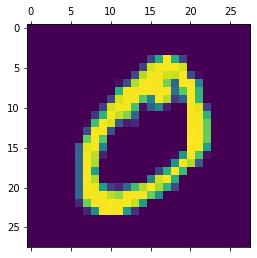

In [6]:
plt.matshow(X_train[1])

In [7]:
y_train[1]

0

In [8]:
#doing scaling
X_train = X_train / 255
X_test = X_test / 255

In [9]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [10]:
X_train_flattened.shape

(60000, 784)

In [11]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

Neural network with no hidden layers

In [14]:
# importing the sequential model
from keras.models import Sequential

In [15]:
# importing different layers from keras
from keras.layers import InputLayer, Dense

In [18]:
model = Sequential()
model.add(InputLayer(input_shape=(784)))
model.add(Dense(units=10,activation='sigmoid'))

In [19]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4714 - accuracy: 0.8760
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3037 - accuracy: 0.9154
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2831 - accuracy: 0.9214
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2736 - accuracy: 0.9238
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2669 - accuracy: 0.9262
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2622 - accuracy: 0.9271
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2588 - accuracy: 0.9287
Epoch 8/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2555 - accuracy: 0.9289
Epoch 9/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2533 - accuracy: 0.9300
Epoch 10/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.250

In [20]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.2692 - accuracy: 0.9266


[0.26923611760139465, 0.9265999794006348]

In [21]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

array([4.6965480e-03, 1.3255983e-08, 1.5588045e-02, 9.7529483e-01,
       1.2025535e-03, 1.5443841e-01, 4.4357478e-08, 9.9983883e-01,
       1.1758059e-01, 7.6849139e-01], dtype=float32)

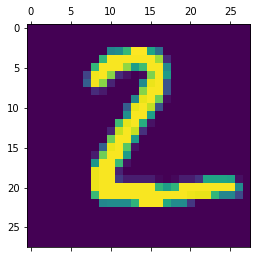

In [22]:
plt.matshow(X_test[1])

In [23]:
np.argmax(y_predicted[1])

2

Using Hidden Layer

In [24]:
model = Sequential()
model.add(InputLayer(input_shape=(784)))
model.add(Dense(units=200,activation='tanh'))
model.add(Dense(units=10,activation='sigmoid'))

In [25]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2748 - accuracy: 0.9193
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1284 - accuracy: 0.9622
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0850 - accuracy: 0.9747
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0592 - accuracy: 0.9827
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0431 - accuracy: 0.9873
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0322 - accuracy: 0.9910
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0238 - accuracy: 0.9934
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0169 - accuracy: 0.9955
Epoch 9/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0140 - accuracy: 0.9966
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.011

In [26]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.0724 - accuracy: 0.9784


[0.0724211111664772, 0.9783999919891357]

Using Flatten layer so that we don't have to call .reshape on input dataset

In [27]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2731 - accuracy: 0.9222
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1244 - accuracy: 0.9635
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0884 - accuracy: 0.9732
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0674 - accuracy: 0.9801
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0538 - accuracy: 0.9840
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0435 - accuracy: 0.9864
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0362 - accuracy: 0.9888
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0304 - accuracy: 0.9901
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0256 - accuracy: 0.9919
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.019

In [28]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.0827 - accuracy: 0.9754


[0.08271344006061554, 0.9753999710083008]